In [ ]:
import keras
import tensorflow as tf

In [ ]:
import sys
print(sys.version)
print(keras.__version__)
print(tf.__version__)

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [13]:
from keras.models import load_model

### MNIST data

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### FNN autoencoder

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

In [9]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [10]:
deep_autoencoder = Model(input_img, decoded)
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
deep_autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.2468 - val_loss: 0.1656
Epoch 2/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1502 - val_loss: 0.1384
Epoch 3/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1325 - val_loss: 0.1255
Epoch 4/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1227 - val_loss: 0.1173
Epoch 5/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1162 - val_loss: 0.1128
Epoch 6/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1121 - val_loss: 0.1092
Epoch 7/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1091 - val_loss: 0.1066
Epoch 8/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1066 - val_loss: 0.1041
Epoch 9/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1047 - val_loss: 0.1

In [ ]:
restored_model = load_model("cnn_autoencoder.h5")

In [14]:
# this model maps an input to its encoded representation
deep_encoder = Model(input_img, encoded)

In [15]:
deep_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total para

In [16]:
# create a placeholder for an encoded (32-dimensional) input
deep_encoded_input = Input(shape=(32,))

In [17]:
deep_decoder_layers = deep_autoencoder.layers[-3](deep_encoded_input)
deep_decoder_layers = deep_autoencoder.layers[-2](deep_decoder_layers)
deep_decoder_layers = deep_autoencoder.layers[-1](deep_decoder_layers)
deep_decoder = Model(deep_encoded_input, deep_decoder_layers)

In [18]:
deep_autoencoder.save("deep_autoencoder.h5")
deep_encoder.save("deep_encoder.h5")
deep_decoder.save("deep_decoder.h5")

In [23]:
del deep_autoencoder
del deep_encoder
del deep_decoder

In [24]:
deep_autoencoder = load_model("deep_autoencoder.h5")
deep_encoder = load_model("deep_encoder.h5")
deep_decoder = load_model("deep_decoder.h5")

C:\Users\grigo\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [25]:
encoded_imgs = deep_encoder.predict(x_test)
decoded_imgs = deep_decoder.predict(encoded_imgs)

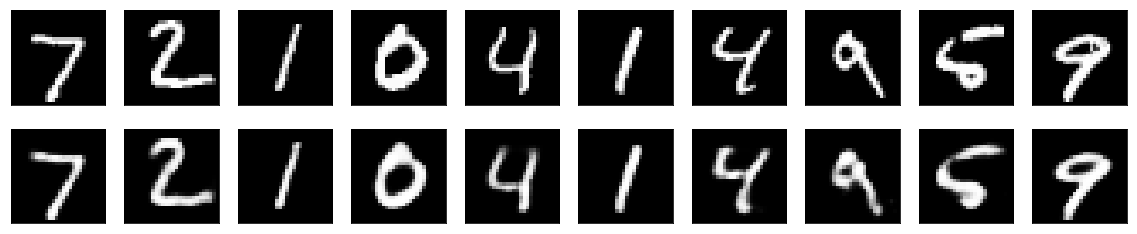

In [26]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
encoded_imgs.shape

(10000, 32)

In [35]:
def draw_imgs(imgs):
    n = imgs.shape[0]
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

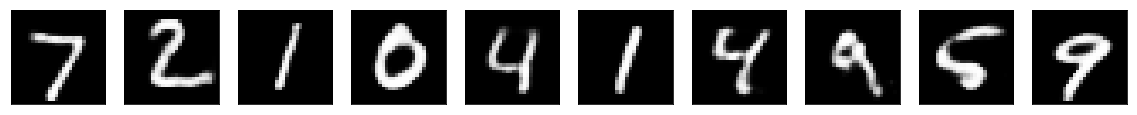

In [54]:
draw_imgs(decoded_imgs[:10])

(10, 32)
[-0.25980756 -1.48956889  0.14294939 -0.21273984 -0.23496021  1.31876164
  0.28986913 -0.08242458 -1.87555    -1.21948485 -1.31152504  0.91736394
 -2.56881871  0.51998745  0.88028217  0.74010501 -0.1386484   0.24087489
  1.07918913  0.0532453  -0.82219688 -1.76935616 -0.20023426 -0.11948409
  0.09841009 -0.33439175  2.51900539  0.77788025 -0.23451896  1.95223592
 -0.97285735 -0.4208433 ]


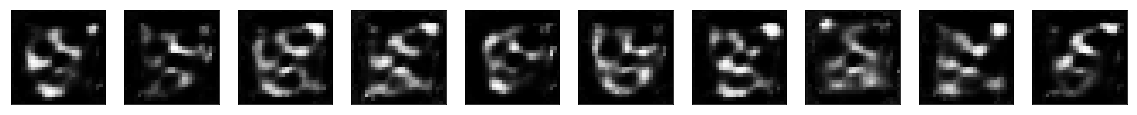

In [58]:
random_imgs = np.random.normal(size=(10,32))
print(random_imgs.shape)
print(random_imgs[4])
draw_imgs(deep_decoder.predict(random_imgs))

(10, 32)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


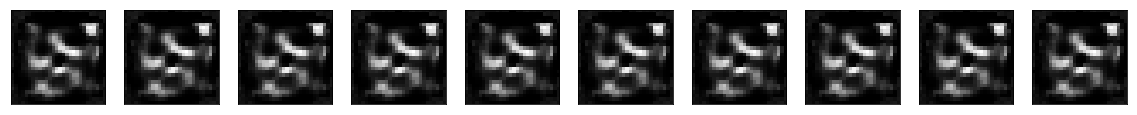

In [50]:
onehot_imgs = np.zeros((10,32))
print(onehot_imgs.shape)
print(onehot_imgs[4])

draw_imgs(deep_decoder.predict(onehot_imgs))

(10, 32)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


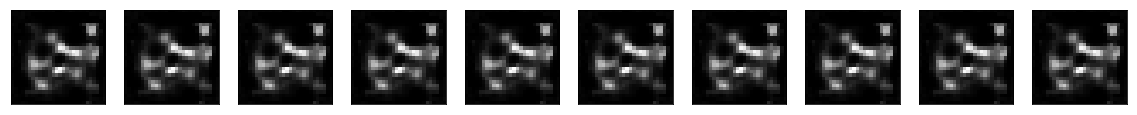

In [51]:
onehot_imgs = np.ones((10,32))
print(onehot_imgs.shape)
print(onehot_imgs[4])
draw_imgs(deep_decoder.predict(onehot_imgs))

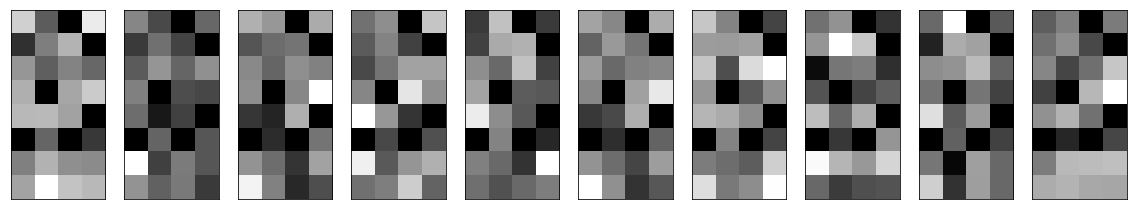

In [55]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [57]:
hidden_code = encoded_imgs[4]
print(hidden_code.shape)
print(hidden_code)

(32,)
[ 2.8946402  3.3225088  7.0917535  8.176005  11.749694   0.
  6.3662796  5.556324   9.632915   8.473219   5.3196316  0.
  7.0471377  6.5422277  5.320432   4.0438447  0.         8.820096
  9.685399   4.59867    4.393215   0.         2.5567997  5.2269344
  2.9038546  0.         3.2770073  4.4128447  0.         1.9658837
 12.73217    6.2194304]


(10, 32)
[12.99525636  5.71332852 -1.3502094   6.98351546  6.33604922  2.44809563
  1.11631536  1.99913301  3.02509109 10.9763986  -3.7236479  -2.40168208
 -2.5786009  -4.25548095  6.23395768 -0.12415335 10.05946793  4.38120323
  5.03353449  9.37841399  2.81222654 -2.54320124  8.58074515 -1.50475513
 -3.0222658   8.84865087  9.53726038  7.2434634   6.58158795  3.00819689
 -1.17505356  6.76792878]


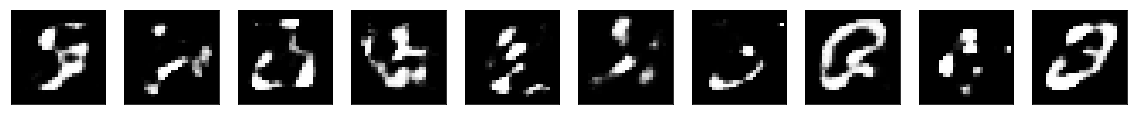

In [59]:
random_imgs = np.random.normal(loc=5.0, scale=5.0, size=(10,32))
print(random_imgs.shape)
print(random_imgs[4])
draw_imgs(deep_decoder.predict(random_imgs))

(10, 32)
[ 6.33244088  6.80162424  0.73439849 15.67659107  3.28222756  5.8223909
  3.58656041  2.21021027  2.74191688 11.8698483   8.4146179   2.12478094
 11.16521008  9.23657265  2.71162642  2.01634909 11.19014146  2.81065907
  1.73688035  6.33648162  1.11033919  0.60599637  2.75637554 18.17618918
  2.65194433  7.66316054 10.02556541  4.06716922  0.77299349  2.50599665
  3.08796185  2.95872529]


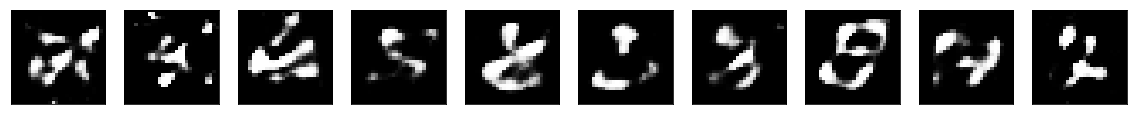

In [60]:
random_imgs = np.abs(np.random.normal(loc=5.0, scale=5.0, size=(10,32)))
print(random_imgs.shape)
print(random_imgs[4])
draw_imgs(deep_decoder.predict(random_imgs))

### Deep regularized FNN autoencoder

In [61]:
from keras import regularizers

In [76]:
hidden_size = 128
hidden_x = 8
hidden_y = 16

In [62]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(hidden_size, activation='relu', activity_regularizer=regularizers.l1(10e-7))(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [63]:
deep_autoencoder_l1 = Model(input_img, decoded)
deep_autoencoder_l1.compile(optimizer='adam', loss='binary_crossentropy')

deep_autoencoder_l1.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 51us/step - loss: 0.2609 - val_loss: 0.1757
Epoch 2/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.1587 - val_loss: 0.1451
Epoch 3/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1394 - val_loss: 0.1309
Epoch 4/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1275 - val_loss: 0.1224
Epoch 5/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1211 - val_loss: 0.1172
Epoch 6/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1163 - val_loss: 0.1127
Epoch 7/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1125 - val_loss: 0.1097
Epoch 8/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1096 - val_loss: 0.1070
Epoch 9/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1071 - val_loss: 0.1

In [69]:
# this model maps an input to its encoded representation
deep_encoder_l1 = Model(input_img, encoded)

In [70]:
# create a placeholder for an encoded (32-dimensional) input
deep_encoded_input_l1 = Input(shape=(hidden_size,))

In [71]:
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-3](deep_encoded_input_l1)
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-2](deep_decoder_layers_l1)
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-1](deep_decoder_layers_l1)
deep_decoder_l1 = Model(deep_encoded_input_l1, deep_decoder_layers_l1)

In [72]:
deep_autoencoder_l1.save("deep_autoencoder_l1.h5")
deep_encoder_l1.save("deep_encoder_l1.h5")
deep_decoder_l1.save("deep_decoder_l1.h5")

del deep_autoencoder_l1, deep_encoder_l1, deep_decoder_l1

deep_autoencoder_l1 = load_model("deep_autoencoder_l1.h5")
deep_encoder_l1 = load_model("deep_encoder_l1.h5")
deep_decoder_l1 = load_model("deep_decoder_l1.h5")

C:\Users\grigo\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [73]:
encoded_imgs = deep_encoder_l1.predict(x_test)
decoded_imgs = deep_decoder_l1.predict(encoded_imgs)

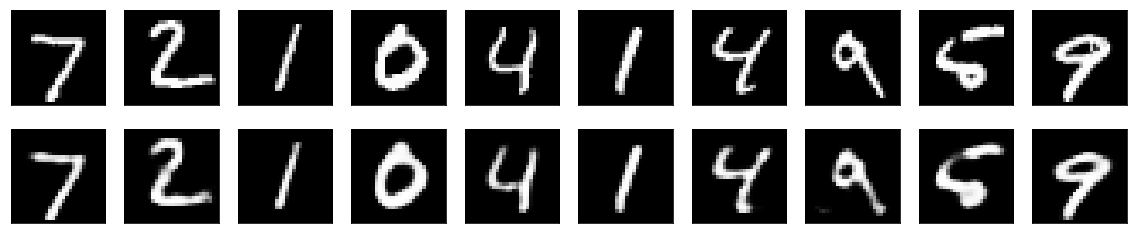

In [74]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

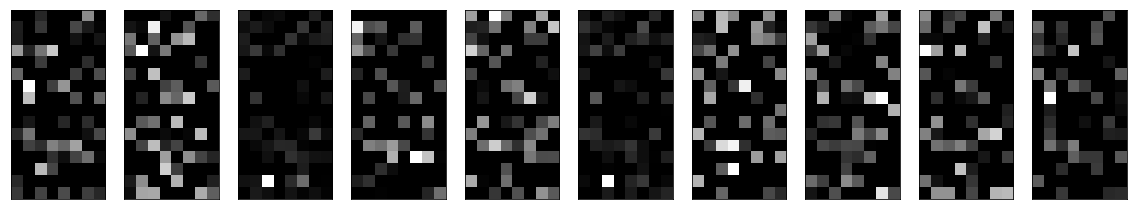

In [77]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(hidden_x, hidden_y).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [79]:
hidden_code = encoded_imgs[4]
print(hidden_code.shape)
print(hidden_code)

(128,)
[0.26620024 0.05032058 0.11203399 0.35224238 0.         0.11904581
 0.         0.         0.         0.         0.21169218 0.
 0.         0.         0.2857271  0.         0.         0.05908995
 0.02939889 0.1671215  0.         0.         0.01783267 0.03605518
 0.         0.24969307 0.         0.18314677 0.         0.
 0.00740685 0.         0.42758247 0.1884791  0.         0.
 0.14285716 0.         0.         0.         0.         0.
 0.         0.34372607 0.         0.         0.         0.0905333
 0.20403975 0.         0.         0.1906846  0.         0.
 0.18634354 0.         0.         0.04055509 0.         0.17228447
 0.         0.13770139 0.18661498 0.         0.         0.
 0.         0.         0.         0.         0.21545604 0.11745346
 0.         0.08868176 0.         0.07888244 0.         0.
 0.         0.13713516 0.         0.21482095 0.10232054 0.
 0.         0.         0.         0.34651366 0.         0.
 0.13192335 0.22953358 0.19877838 0.         0.         0.
 0

In [87]:
num = hidden_size

onehot_imgs = np.zeros((num,hidden_size))
print(onehot_imgs.shape)

for i in range(num):
    onehot_imgs[i,i] = 1.0

print(onehot_imgs[4])

(128, 128)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [90]:
onehot_imgs[0:16,:].shape

(16, 128)

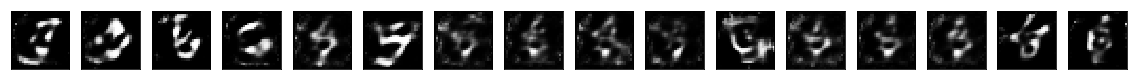

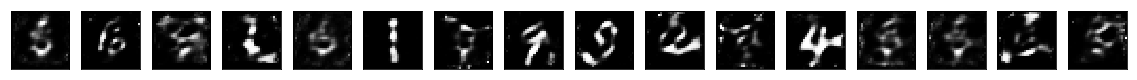

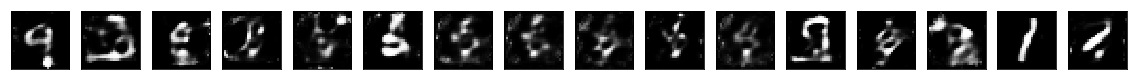

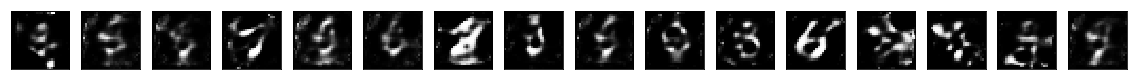

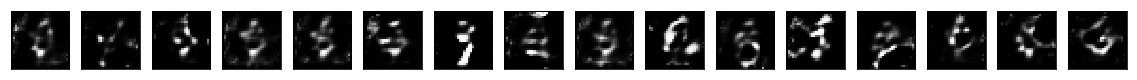

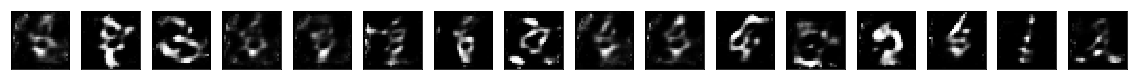

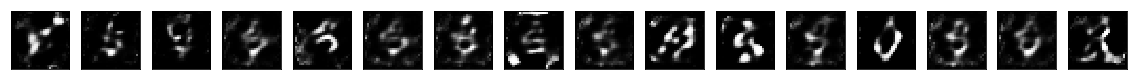

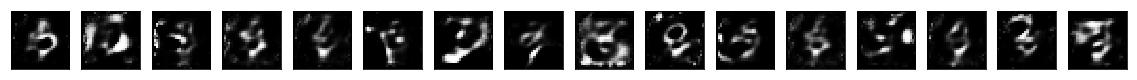

In [91]:
for i in range(0,128,16):
    draw_imgs(deep_decoder_l1.predict(onehot_imgs[i:i+16,:]))

## CNN autoencoder

In [105]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [93]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [103]:
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

In [95]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [96]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [97]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [98]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [107]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

cnn_autoencoder = Model(input_img, decoded)
cnn_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [108]:
cnn_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [114]:
cnn_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.2131 - val_loss: 0.1433
Epoch 2/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.1333 - val_loss: 0.1252
Epoch 3/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.1216 - val_loss: 0.1170
Epoch 4/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.1155 - val_loss: 0.1122
Epoch 5/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.1115 - val_loss: 0.1088
Epoch 6/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.1086 - val_loss: 0.1062
Epoch 7/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.1064 - val_loss: 0.1055
Epoch 8/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1048 - val_loss: 0.1027
Epoch 9/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.1034 - val_loss: 0.1016


In [115]:
cnn_autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0905 - val_loss: 0.0894
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.0904 - val_loss: 0.0893
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0904 - val_loss: 0.0894
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0904 - val_loss: 0.0895
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0904 - val_loss: 0.0897


In [116]:
cnn_autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0903 - val_loss: 0.0892
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0902 - val_loss: 0.0893
Epoch 3/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0902 - val_loss: 0.0892
Epoch 4/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.0902 - val_loss: 0.0894
Epoch 5/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.0903 - val_loss: 0.0891


In [117]:
cnn_autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=4096,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0902 - val_loss: 0.0891
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0901 - val_loss: 0.0891
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0901 - val_loss: 0.0891
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0901 - val_loss: 0.0891
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0901 - val_loss: 0.0891


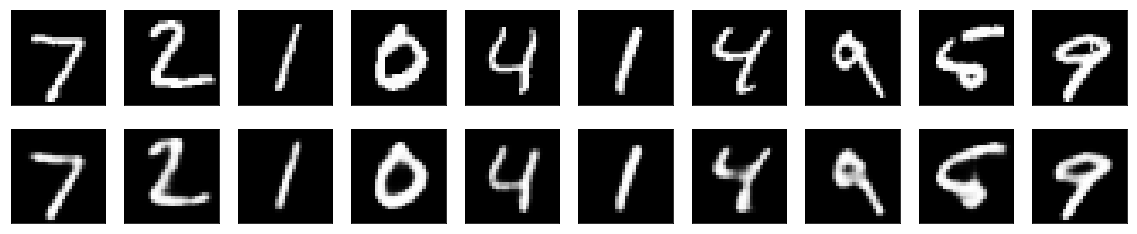

In [118]:
decoded_imgs = cnn_autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [120]:
cnn_encoder = Model(input_img, encoded)
cnn_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 8)           0         
Total para

In [123]:
cnn_encoded_input = Input(shape=(4,4,8,))
cnn_decoder_layers = cnn_autoencoder.layers[-7](cnn_encoded_input)
cnn_decoder_layers = cnn_autoencoder.layers[-6](cnn_decoder_layers)
cnn_decoder_layers = cnn_autoencoder.layers[-5](cnn_decoder_layers)
cnn_decoder_layers = cnn_autoencoder.layers[-4](cnn_decoder_layers)
cnn_decoder_layers = cnn_autoencoder.layers[-3](cnn_decoder_layers)
cnn_decoder_layers = cnn_autoencoder.layers[-2](cnn_decoder_layers)
cnn_decoder_layers = cnn_autoencoder.layers[-1](cnn_decoder_layers)
cnn_decoder = Model(cnn_encoded_input, cnn_decoder_layers)
cnn_decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_14 (Conv2D)           multiple                  584       
_________________________________________________________________
up_sampling2d_5 (UpSampling2 multiple                  0         
_________________________________________________________________
conv2d_15 (Conv2D)           multiple                  1168      
_________________________________________________________________
up_sampling2d_6 (UpSampling2 multiple                  0         
__________

In [124]:
cnn_autoencoder.save("cnn_autoencoder.h5")
cnn_encoder.save("cnn_encoder.h5")
cnn_decoder.save("cnn_decoder.h5")

del cnn_autoencoder, cnn_encoder, cnn_decoder

cnn_autoencoder = load_model("cnn_autoencoder.h5")
cnn_encoder = load_model("cnn_encoder.h5")
cnn_decoder = load_model("cnn_decoder.h5")

C:\Users\grigo\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
hidden_code = encoded_imgs[4]
print(hidden_code.shape)
print(hidden_code)

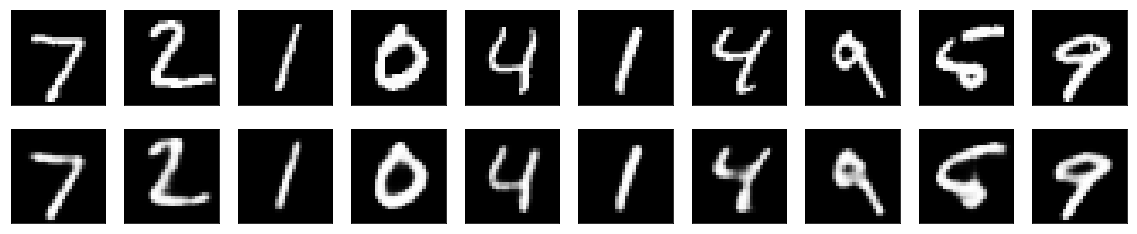

In [125]:
encoded_imgs = cnn_encoder.predict(x_test)
decoded_imgs = cnn_decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

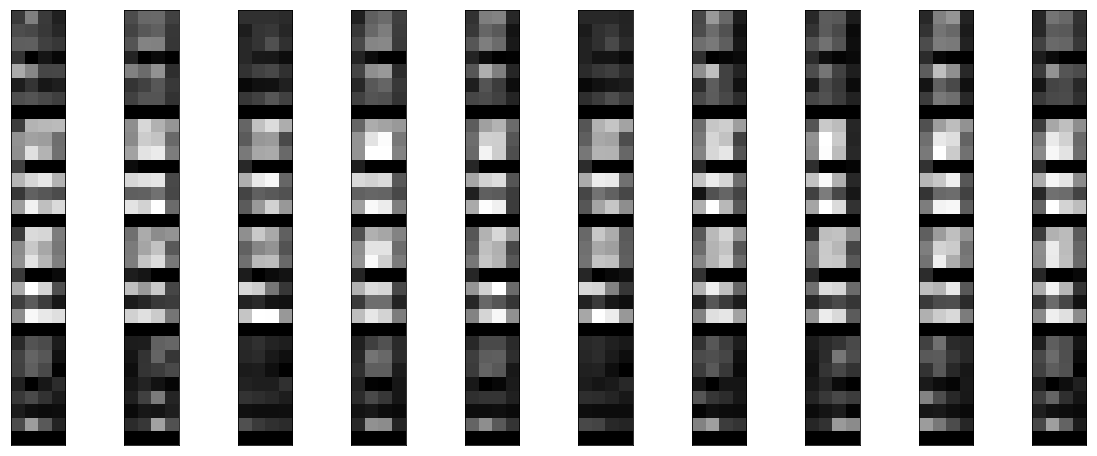

In [126]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [127]:
hidden_code = encoded_imgs[4]
print(hidden_code.shape)
print(hidden_code)

(4, 4, 8)
[[[1.8740509  2.1266253  3.2220693  1.4042017  3.236236   1.1321533
   2.610865   0.        ]
  [3.4352198  4.0972695  3.9178154  1.4253926  6.1944075  1.2497128
   6.35614    0.        ]
  [3.2094035  3.6434119  4.4651895  1.4284182  5.5876064  1.4309797
   4.9363375  0.        ]
  [1.5192839  2.3353274  2.2257187  0.92628276 1.7536935  0.5143738
   3.7476091  0.        ]]

 [[4.722571   3.8220108  4.7005205  0.5011233  6.495943   3.1386375
   2.8480954  0.        ]
  [5.9826517  7.767643   9.067347   0.         7.828318   3.5721338
   9.462496   0.        ]
  [6.645298   7.1523767  7.4187617  0.         7.858602   3.8576357
   7.9727025  0.        ]
  [2.778734   3.5013058  3.7497432  0.         1.9404867  0.4956242
   5.296578   0.        ]]

 [[4.9509044  3.3217537  3.9934256  0.         4.7522483  2.281831
   2.441308   0.        ]
  [6.7241015  7.7154207  7.674699   0.         8.214681   3.407653
   8.969865   0.        ]
  [8.023105   6.5660686  6.6769047  0.         9

In [136]:
random_imgs = np.abs(np.random.normal(loc=3.0, scale=3.0, size=(128,4,4,8)))
print(random_imgs.shape)
print(random_imgs[4])
#imgs=cnn_decoder.predict(random_imgs)
#draw_imgs(imgs)

(128, 4, 4, 8)
[[[ 4.09370806  0.08478388  5.92554364  5.37547598  1.38329717
    4.89372225  6.03679512  1.95544929]
  [10.2532695   6.59466283  3.26896945  0.78647212  6.40594187
    1.5799414   2.58567345  2.88420285]
  [ 2.18319495  4.49758228  6.3585989   1.0355646   6.56049027
    4.77786694  6.33319748  5.53880531]
  [ 2.12180657  3.93869465  7.36473021  0.95038156  8.5049078
    4.84586098  4.95031079  6.70735371]]

 [[ 0.66776517  6.15187007  1.02281577  0.30120648  7.35468095
    3.68426994  3.08859842  0.8947344 ]
  [ 2.55539907  0.30758626  0.66788162  6.54893477  2.35192194
    9.57514422  3.17490597  9.30399434]
  [ 1.85750866  2.53738231  2.34005819  5.92117703  4.19458487
    3.49620263  1.2668118   3.7194637 ]
  [ 2.33762887  1.45869899  9.05298872  2.86008982  2.90943347
    7.98367449  2.12808867  4.32680651]]

 [[ 2.74988974  6.73080177  3.14254954  4.57851031  4.75178801
    3.43602188  0.19628385  3.92778176]
  [ 7.35289191  3.06474741  0.82631729  1.22168582  9.7

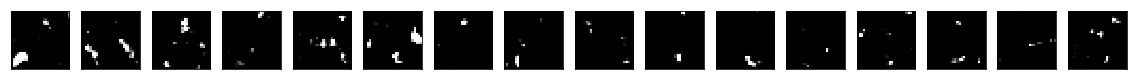

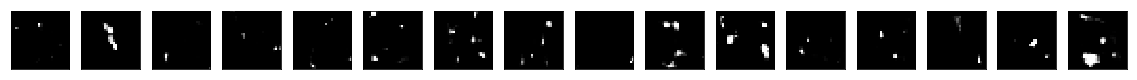

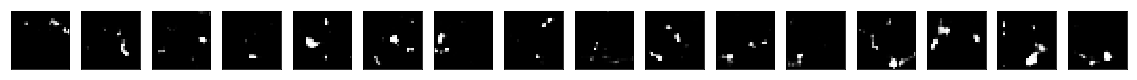

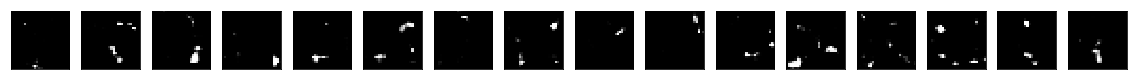

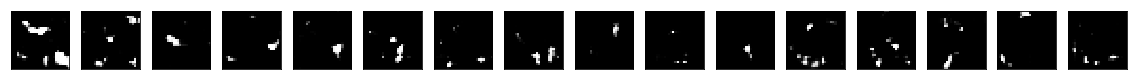

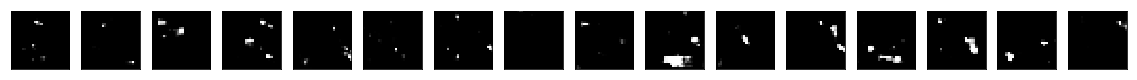

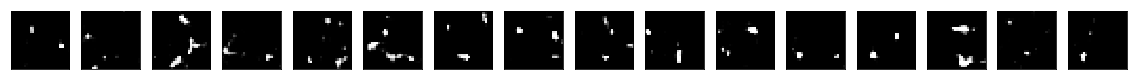

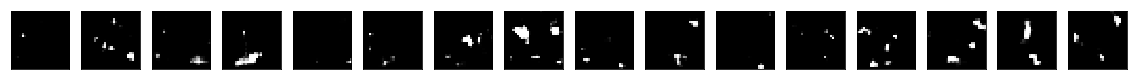

In [137]:
for i in range(0,128,16):
    draw_imgs(cnn_decoder.predict(random_imgs[i:i+16,:,:,:]))

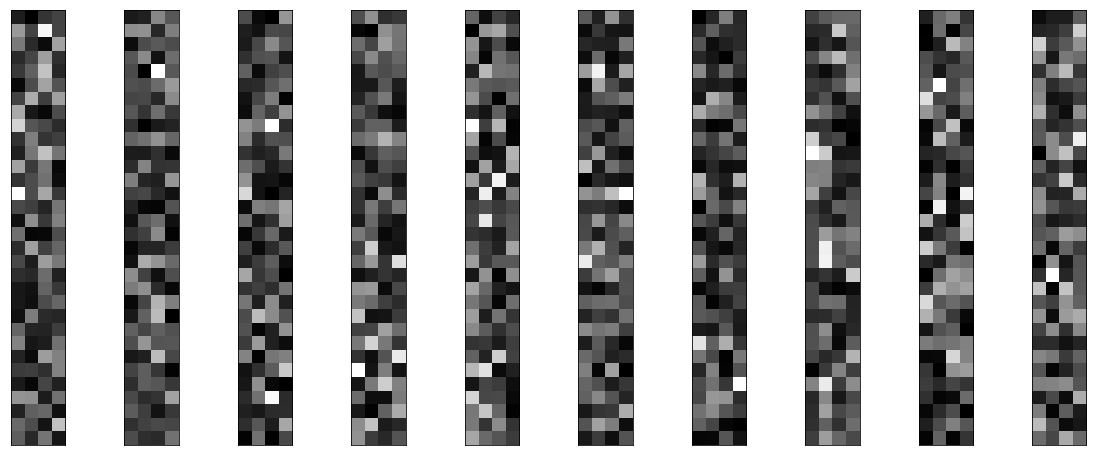

In [138]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(random_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [145]:
hidden_code = encoded_imgs[4]
print(hidden_code.shape)
x=np.expand_dims(hidden_code, axis=0)
print(x.shape)

(4, 4, 8)
(1, 4, 4, 8)


(1, 4, 4, 8)
(1, 28, 28, 1)


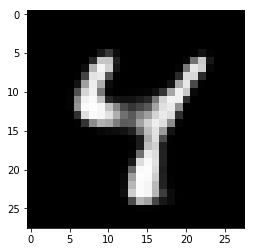

In [184]:
hidden_code = encoded_imgs[6:7,:,:,:]
print(hidden_code.shape)
img = cnn_decoder.predict(hidden_code)
print(img.shape)
plt.imshow(img[0].reshape(28, 28))

In [154]:
hidden_code

array([[[[1.8740509 , 2.1266253 , 3.2220693 , 1.4042017 , 3.236236  ,
          1.1321533 , 2.610865  , 0.        ],
         [3.4352198 , 4.0972695 , 3.9178154 , 1.4253926 , 6.1944075 ,
          1.2497128 , 6.35614   , 0.        ],
         [3.2094035 , 3.6434119 , 4.4651895 , 1.4284182 , 5.5876064 ,
          1.4309797 , 4.9363375 , 0.        ],
         [1.5192839 , 2.3353274 , 2.2257187 , 0.92628276, 1.7536935 ,
          0.5143738 , 3.7476091 , 0.        ]],

        [[4.722571  , 3.8220108 , 4.7005205 , 0.5011233 , 6.495943  ,
          3.1386375 , 2.8480954 , 0.        ],
         [5.9826517 , 7.767643  , 9.067347  , 0.        , 7.828318  ,
          3.5721338 , 9.462496  , 0.        ],
         [6.645298  , 7.1523767 , 7.4187617 , 0.        , 7.858602  ,
          3.8576357 , 7.9727025 , 0.        ],
         [2.778734  , 3.5013058 , 3.7497432 , 0.        , 1.9404867 ,
          0.4956242 , 5.296578  , 0.        ]],

        [[4.9509044 , 3.3217537 , 3.9934256 , 0.        , 4.

In [156]:
hidden_code = hidden_code + np.random.normal(size=(1,4,4,8))
hidden_code

array([[[[ 1.84721454,  2.5642347 ,  4.29830775,  3.11670417,
           2.39546431,  1.00837515,  2.15904676, -3.14229225],
         [ 5.28335696,  4.00968169,  3.27672355,  1.87219851,
           4.20600552,  1.86318199,  6.9707713 , -0.60134473],
         [ 1.0430704 ,  3.04805296,  4.95367474,  1.74601996,
           2.86308657,  0.70766187,  3.62137605,  0.19372123],
         [ 0.58038242,  3.72046554,  1.06170568,  0.34383322,
           1.93750569,  1.39668002,  5.07416049,  1.82384995]],

        [[ 2.03769472,  6.8593078 ,  5.79876531,  2.7349209 ,
           7.12971611,  4.01154787,  3.64363055, -1.62649956],
         [ 8.04154716,  9.02717137, 10.23512167, -1.22523632,
           8.39250302,  5.30079722, 11.38351695,  0.46225951],
         [ 7.50323943,  6.40491777,  8.51330166, -1.86385436,
           7.61746006,  5.32595093,  8.57887912,  0.83741263],
         [ 1.00255415,  3.58829596,  1.73285949,  0.43653785,
           0.98388124,  0.47682218,  6.11606816, -0.43899101]

(1, 28, 28, 1)


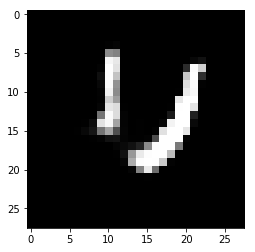

In [157]:
img = cnn_decoder.predict(hidden_code)
print(img.shape)
plt.imshow(img[0].reshape(28, 28))

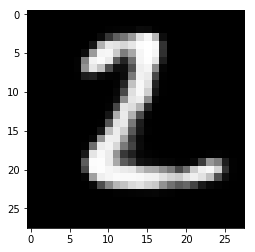

In [187]:
idx = 1
hidden_code = encoded_imgs[idx:idx+1,:,:,:]
img = cnn_decoder.predict(hidden_code)
plt.imshow(img[0].reshape(28, 28))

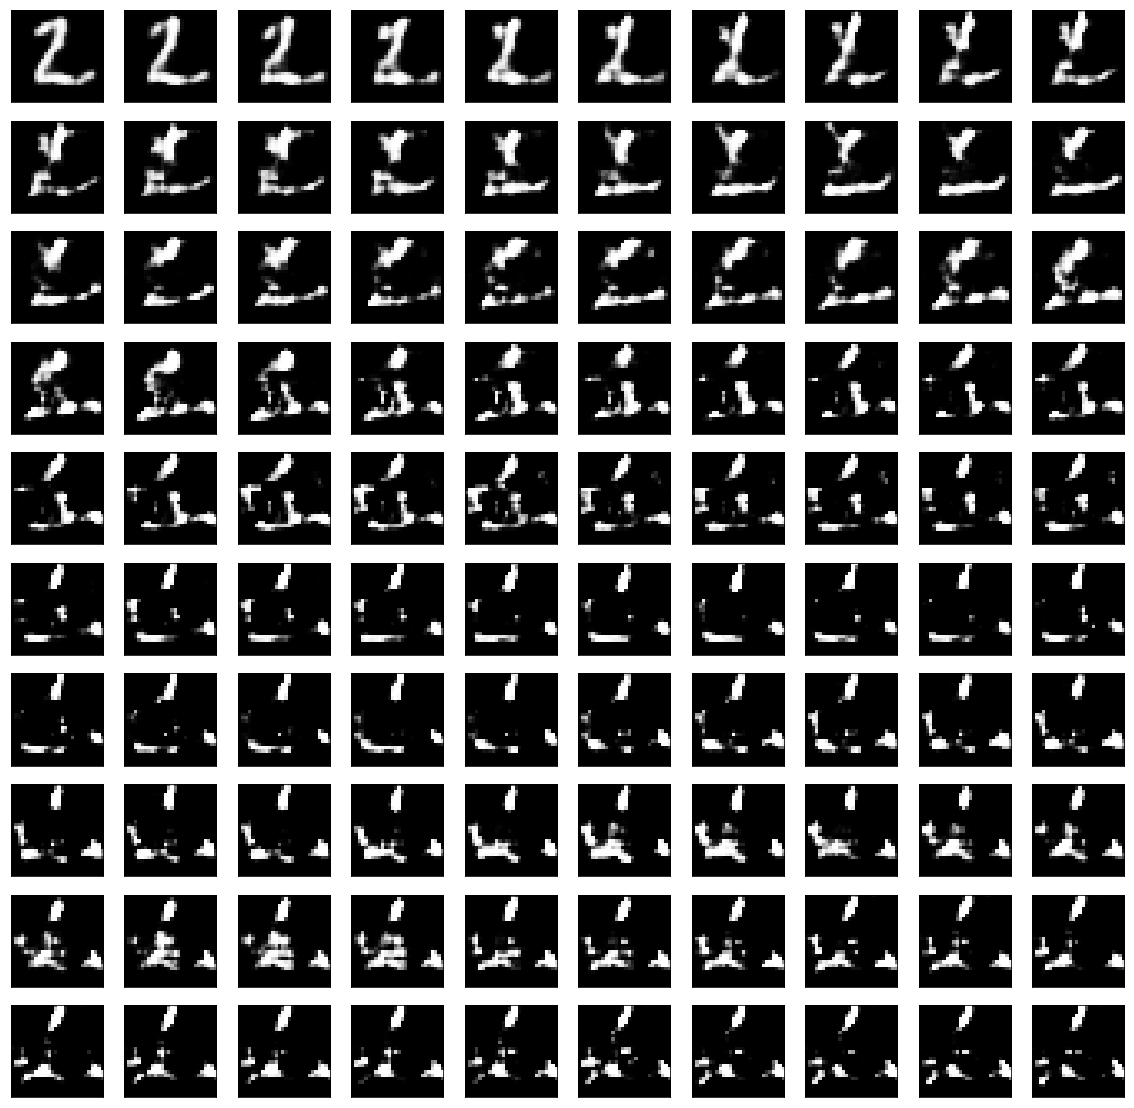

In [188]:
rows = 10
cols = 10
plt.figure(figsize=(20, 20))

for r in range(rows):
    for c in range(cols):
        hidden_code = hidden_code + np.random.normal(loc=0.0, scale=0.3, size=(1,4,4,8))
        img = cnn_decoder.predict(hidden_code)
    
        ax = plt.subplot(rows, cols, (r)*(cols) + c+1)
        plt.imshow(img[0].reshape(28, 28))
    
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)